# Bài toán
Bài toán phân loại văn bản (text classification) với dữ liệu là các văn bản Tiếng Việt mỗi văn bản được gán đúng một nhãn "an ninh", "an ninh trật tự",... Xây dựng mô hình để để tự động phân loại văn bản bằng cách học từ bộ dữ liệu đã cho.

In [1]:
import os
import gensim
from pyvi import ViTokenizer, ViPosTagger

# Nhập dữ liệu

In [2]:
with open('vietnamese-stopwords-dash.txt',encoding='utf8') as f: #stop words
    stop_words=f.read().splitlines()

def standardise(k):
    k = gensim.utils.simple_preprocess(k) # loai ki tu dac biet, viet hoa, ...
    k = ' '.join(k)                       # noi list lai thanh chuoi
    k = ViTokenizer.tokenize(k)  # add dash
    k = k.split(' ')
    k = [j for j in k if j not in stop_words]
    k = ' '.join(k)
    return k    


In [3]:
# danh sach cac file txt cho vao mang dirs
path=os.getcwd()
path=path.replace('\\','/')
path=path+"/data"

In [4]:
# doc du lieu
X=[]
y=[]

for file in os.listdir(path):
        with open(path+'/'+file, encoding="utf8",) as f:
            print(file)
            data = f.read()
            data=data.split('\n' + '*' * 100 + '\n')
            for i in data:
                if i!='':
                    X.append(standardise(i))
                    y.append(file.replace('.txt',''))

an_ninh.txt
an_ninh_trat_tu.txt
bat_dong_san.txt
bien_dao.txt
buu_chinh_vien_thong.txt
chinh_sach.txt
chinh_tri.txt
cong_nghiep.txt
dan_toc.txt
dau_thau.txt
doi_ngoai.txt
do_thi.txt
du_lich.txt
giai_tri.txt
giao_duc.txt
giao_thong_van_tai.txt
hai_quan.txt
khoa_hoc_cong_nghe.txt
kiem_toan.txt
kinh_doanh.txt
kinh_te.txt
lao_dong.txt
lao_dong_thuong_binh_va_xa_hoi.txt
nang_luong.txt
nong_nghiep.txt
phap_luat.txt
phu_nu.txt
quoc_hoi.txt
quoc_phong.txt
so_huu_tri_tue.txt
suc_khoe.txt
tai_chinh.txt
tai_nguyen_moi_truong.txt
thanh_nien.txt
thanh_tra.txt
the_thao.txt
thoi_trang.txt
thong_tin_va_truyen_thong.txt
thuong_mai.txt
tre_em.txt
van_hoa.txt
van_nghe.txt
xay_dung.txt
xa_hoi.txt
y_te.txt


Đưa dữ liệu trong list X,y về dữ liệu kiểu dataframe để dễ thao tác.

In [5]:
import pandas as pd

data = pd.DataFrame()
data['doc'] = X
data['label']=y
print(data.head())
print(data.shape)

                                                 doc    label
0  cơ_quan công_an khai đối_tượng biện_pháp nghiệ...  an_ninh
1  đợt ra_quân giám_đốc công_an tỉnh công_an địa_...  an_ninh
2  tang_vật phương_tiện đồn biên_phòng cửa_khẩu m...  an_ninh
3  đại_tá lê hồng nam giám_đốc công_an tỉnh long ...  an_ninh
4  cơ_quan công_an khai đối_tượng dũng tang_vật v...  an_ninh
(71786, 2)


Loại bỏ các văn bản bị lặp lại trong dataframe.

In [6]:
data = data.drop_duplicates(subset=['doc'])
data.shape

(60758, 2)

In [7]:
X=data['doc']
y=data['label']

Ghi dữ liệu vào file pickle để sử dụng lần sau cho tiện.

In [1]:
# dữ liệu sau khi được loại các văn bản lặp lại, loại stopwords được cho vào file pickle
import pickle

#pickle.dump(X, open('X_data.pkl', 'wb'))
#pickle.dump(y, open('y_data.pkl', 'wb'))

X = pickle.load(open('X_data.pkl', 'rb'))
y = pickle.load(open('y_data.pkl', 'rb'))

# Cân bằng nhãn

Counter({33: 2776, 34: 2204, 9: 2051, 18: 1945, 30: 1941, 2: 1907, 5: 1852, 3: 1845, 7: 1840, 44: 1775, 16: 1765, 27: 1714, 28: 1705, 12: 1700, 14: 1697, 25: 1677, 35: 1602, 13: 1588, 6: 1541, 15: 1518, 42: 1503, 36: 1501, 19: 1478, 43: 1431, 4: 1420, 26: 1385, 32: 1328, 20: 1322, 17: 1273, 38: 1182, 40: 1142, 31: 1114, 10: 999, 22: 987, 39: 959, 41: 950, 24: 754, 29: 737, 1: 685, 23: 656, 11: 579, 21: 316, 37: 156, 0: 144, 8: 114})


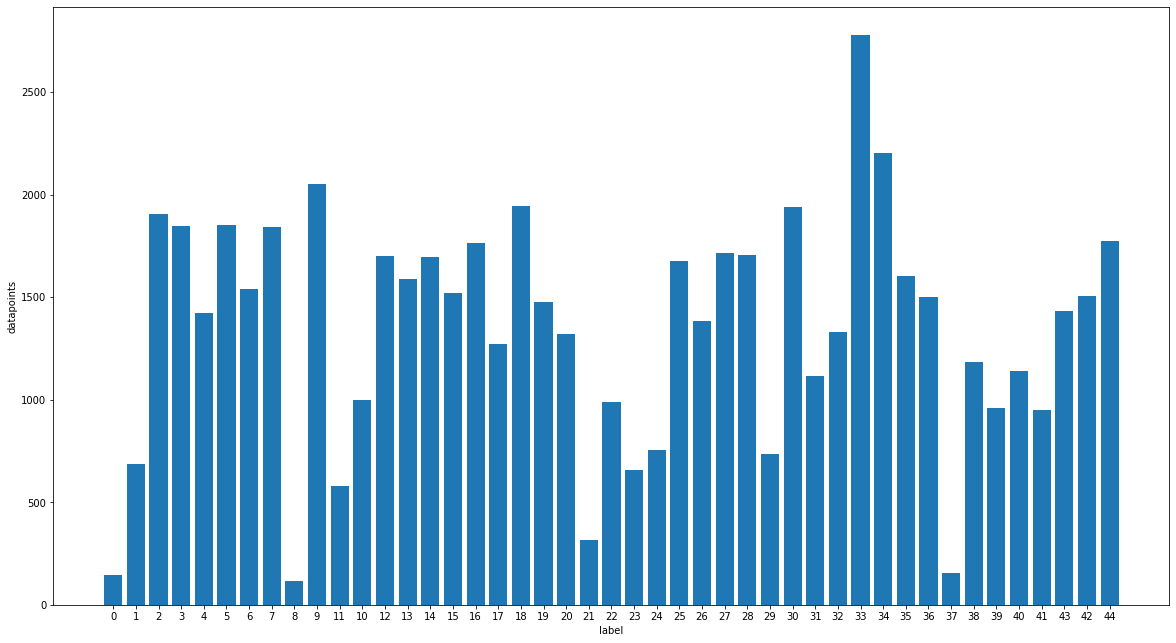

In [18]:
# vẽ phân phối các lớp
import collections
mydict=collections.Counter(y)
print (mydict)

import matplotlib.pyplot as plt
e=[str(i) for i in mydict]
f=[i for i in mydict.values()]
fig, ax = plt.subplots(1, 1, figsize=(20,11))
plt.bar(e,f)
plt.xlabel('label')
plt.ylabel('datapoints')
plt.show()

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(X)

X_bow = count_vect.transform(X)
print(X_bow)
print(X_bow.shape)

  (0, 8109)	1
  (0, 11541)	1
  (0, 12736)	1
  (0, 16665)	1
  (0, 23997)	5
  (0, 24833)	3
  (0, 25428)	1
  (0, 31290)	1
  (0, 45500)	1
  (0, 45555)	1
  (0, 48313)	1
  (0, 48407)	1
  (0, 49035)	1
  (0, 49083)	1
  (0, 56663)	2
  (0, 63405)	2
  (0, 65960)	3
  (0, 66104)	1
  (0, 67066)	1
  (0, 67258)	1
  (0, 76459)	1
  (0, 88388)	1
  (0, 89329)	1
  (0, 89430)	1
  (0, 89442)	2
  :	:
  (58982, 121274)	3
  (58982, 121376)	1
  (58982, 121425)	1
  (58982, 121912)	1
  (58982, 122854)	1
  (58982, 123420)	2
  (58982, 124657)	1
  (58982, 125429)	1
  (58982, 126407)	3
  (58982, 130487)	1
  (58982, 131750)	1
  (58982, 132275)	1
  (58982, 133384)	2
  (58982, 134096)	1
  (58982, 136324)	6
  (58982, 136402)	1
  (58982, 137325)	1
  (58982, 137960)	1
  (58982, 141320)	1
  (58982, 141554)	1
  (58982, 142678)	2
  (58982, 142849)	1
  (58982, 143052)	2
  (58982, 143256)	1
  (58982, 145501)	1
(58983, 148069)


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
tf_idf = TfidfVectorizer(analyzer='word', max_features=200000)
tf_idf.fit(X) 
X_tfidf =  tf_idf.transform(X)
print(X_tfidf)
print(X_tfidf.shape)

  (0, 145608)	0.06485728751735186
  (0, 145139)	0.06824476212322207
  (0, 145026)	0.22680641273455868
  (0, 142678)	0.06823975190626352
  (0, 142411)	0.23852710636150254
  (0, 141577)	0.06027843400917747
  (0, 140888)	0.14530624367994444
  (0, 137933)	0.09875455297733525
  (0, 137627)	0.10419966832038036
  (0, 136359)	0.08308203189023255
  (0, 133863)	0.13719125198572235
  (0, 133051)	0.1473227558992914
  (0, 127124)	0.10109334892132904
  (0, 124869)	0.09525414831021344
  (0, 121583)	0.07980479380496758
  (0, 120738)	0.07758230920208142
  (0, 119673)	0.043281318112085805
  (0, 118709)	0.13259274668787668
  (0, 112337)	0.09390750166352091
  (0, 112029)	0.3867854669558101
  (0, 107557)	0.16912903362821083
  (0, 103083)	0.05699644026583723
  (0, 94618)	0.10622722774960115
  (0, 94087)	0.04270190493760923
  (0, 90058)	0.26241080988798143
  :	:
  (58982, 47443)	0.04031681574550228
  (58982, 44311)	0.04488060842845692
  (58982, 44112)	0.09824451764788951
  (58982, 40821)	0.06739121485177184


In [4]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=300, random_state=42)
svd.fit(X_tfidf)


X_tfidf_svd = svd.transform(X_tfidf)
print(X_tfidf_svd)
print(X_tfidf_svd.shape)

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
tf_idf = TfidfVectorizer(analyzer='word', max_features=50000)
tf_idf.fit(X) 
X_tfidf =  tf_idf.transform(X)
print(X_tfidf)
print(X_tfidf.shape)

  (0, 49538)	0.0706306184991728
  (0, 49375)	0.07431963226649761
  (0, 49320)	0.24699579375308758
  (0, 48396)	0.07431417606047755
  (0, 48281)	0.25975981568183193
  (0, 47994)	0.06564417414297088
  (0, 47739)	0.15824081233986576
  (0, 46841)	0.10754528015887813
  (0, 46737)	0.11347509744233635
  (0, 46337)	0.09047765522116799
  (0, 45541)	0.14940345721111153
  (0, 45241)	0.1604368262454043
  (0, 43404)	0.11009226617064194
  (0, 42606)	0.10373328375723924
  (0, 41498)	0.08690869077951782
  (0, 41203)	0.08448836966965426
  (0, 40778)	0.04713404437239543
  (0, 40461)	0.14439561174314208
  (0, 38208)	0.1022667641231845
  (0, 38078)	0.4212155303329847
  (0, 36567)	0.18418420980266847
  (0, 35082)	0.06207003071397659
  (0, 32123)	0.11568314193527603
  (0, 31911)	0.04650305420234089
  (0, 30608)	0.2857695490009252
  :	:
  (58982, 16333)	0.04124522596266261
  (58982, 15391)	0.04591411305045823
  (58982, 15319)	0.10050687920293036
  (58982, 14307)	0.06894309069460085
  (58982, 14297)	0.1572785

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
tf_idf = TfidfVectorizer(analyzer='word', max_features=20000)
tf_idf.fit(X) 
X_tfidf =  tf_idf.transform(X)
print(X_tfidf)
print(X_tfidf.shape)

  (0, 19797)	0.07186001821728201
  (0, 19718)	0.07561324312394016
  (0, 19683)	0.25129501363345386
  (0, 19197)	0.07560769194695303
  (0, 19149)	0.26428120670121097
  (0, 19008)	0.06678677958664013
  (0, 18892)	0.1609951590271496
  (0, 18531)	0.10941721813593053
  (0, 18487)	0.11545025008537398
  (0, 18301)	0.0920525133519288
  (0, 17984)	0.15200398049807715
  (0, 17848)	0.1632293968493662
  (0, 17152)	0.11200853710061796
  (0, 16740)	0.10553886995370142
  (0, 16245)	0.08842142735490023
  (0, 16106)	0.08595897802708492
  (0, 15886)	0.04795446166585929
  (0, 15752)	0.14690896824695504
  (0, 14722)	0.10404682401302472
  (0, 14660)	0.4285472267736814
  (0, 13513)	0.0631504244565811
  (0, 12553)	0.1176967278999364
  (0, 12446)	0.047312488452562626
  (0, 12046)	0.2907436666067345
  (0, 11928)	0.13453993407461484
  :	:
  (58982, 6175)	0.04165203038298713
  (58982, 5816)	0.046366967016178144
  (58982, 5798)	0.10149818526995946
  (58982, 5424)	0.06962308100598345
  (58982, 5421)	0.158829817465

In [3]:
# chuyển label về dạng số
import sklearn
encoder = sklearn.preprocessing.LabelEncoder()
y = encoder.fit_transform(y)

encoder.classes_

array(['an_ninh', 'an_ninh_trat_tu', 'bat_dong_san', 'bien_dao',
       'buu_chinh_vien_thong', 'chinh_sach', 'chinh_tri', 'cong_nghiep',
       'dan_toc', 'dau_thau', 'do_thi', 'doi_ngoai', 'du_lich',
       'giai_tri', 'giao_duc', 'giao_thong_van_tai', 'hai_quan',
       'khoa_hoc_cong_nghe', 'kiem_toan', 'kinh_doanh', 'kinh_te',
       'lao_dong', 'lao_dong_thuong_binh_va_xa_hoi', 'nang_luong',
       'nong_nghiep', 'phap_luat', 'phu_nu', 'quoc_hoi', 'quoc_phong',
       'so_huu_tri_tue', 'suc_khoe', 'tai_chinh', 'tai_nguyen_moi_truong',
       'thanh_nien', 'thanh_tra', 'the_thao', 'thoi_trang',
       'thong_tin_va_truyen_thong', 'thuong_mai', 'tre_em', 'van_hoa',
       'van_nghe', 'xa_hoi', 'xay_dung'], dtype=object)

In [4]:
# cân bằng lớp
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_tfidf, y = oversample.fit_resample(X_tfidf, y)
#X_tfidf_svd, y = oversample.fit_resample(X_tfidf_svd, y)

Using TensorFlow backend.


In [8]:
# vẽ phân phối các lớp sau khi cân bằng lớp
import collections
print(collections.Counter(y))




Counter({0: 2776, 1: 2776, 2: 2776, 3: 2776, 4: 2776, 5: 2776, 6: 2776, 7: 2776, 8: 2776, 9: 2776, 11: 2776, 10: 2776, 12: 2776, 13: 2776, 14: 2776, 15: 2776, 16: 2776, 17: 2776, 18: 2776, 19: 2776, 20: 2776, 21: 2776, 22: 2776, 23: 2776, 24: 2776, 25: 2776, 26: 2776, 27: 2776, 28: 2776, 29: 2776, 30: 2776, 31: 2776, 32: 2776, 33: 2776, 34: 2776, 35: 2776, 36: 2776, 37: 2776, 38: 2776, 39: 2776, 40: 2776, 41: 2776, 43: 2776, 42: 2776})


# Naive Bayes

In [23]:
# tfidf 150 000
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split    
    
X_train, X_val, y_train, y_val = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)
       
cl=MultinomialNB().fit(X_train, y_train)

train_predictions = cl.predict(X_train)
val_predictions = cl.predict(X_val)

print("Train accuracy: ", sklearn.metrics.accuracy_score(train_predictions, y_train))
print("Validation accuracy: ", sklearn.metrics.accuracy_score(val_predictions, y_val))


Train accuracy:  0.6689881524175473
Validation accuracy:  0.6449460988365887


In [9]:
# tfidf 50 000
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split    
    
X_train, X_val, y_train, y_val = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)
       
cl=MultinomialNB().fit(X_train, y_train)

train_predictions = cl.predict(X_train)
val_predictions = cl.predict(X_val)

print("Train accuracy: ", sklearn.metrics.accuracy_score(train_predictions, y_train))
print("Validation accuracy: ", sklearn.metrics.accuracy_score(val_predictions, y_val))


Train accuracy:  0.6795204678362573
Validation accuracy:  0.6556598624604301


In [5]:
# tfidf 20 000
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split    
    
X_train, X_val, y_train, y_val = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)
       
cl=MultinomialNB().fit(X_train, y_train)

train_predictions = cl.predict(X_train)
val_predictions = cl.predict(X_val)

print("Train accuracy: ", sklearn.metrics.accuracy_score(train_predictions, y_train))
print("Validation accuracy: ", sklearn.metrics.accuracy_score(val_predictions, y_val))


Train accuracy:  0.6721754385964912
Validation accuracy:  0.6506112869774042


In [5]:
# bow 150k
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split    
    
X_train, X_val, y_train, y_val = train_test_split(X_bow, y, test_size=0.3, random_state=42)
       
cl=MultinomialNB().fit(X_train, y_train)

train_predictions = cl.predict(X_train)
val_predictions = cl.predict(X_val)

print("Train accuracy: ", sklearn.metrics.accuracy_score(train_predictions, y_train))
print("Validation accuracy: ", sklearn.metrics.accuracy_score(val_predictions, y_val))

Train accuracy:  0.682514619883041
Validation accuracy:  0.6442255212313066


# Logistic Regression

In [24]:
# tfidf 150 000
from sklearn.linear_model import LogisticRegression   
    
X_train, X_val, y_train, y_val = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)
       
cl=LogisticRegression().fit(X_train, y_train)

train_predictions = cl.predict(X_train)
val_predictions = cl.predict(X_val)

print("Train accuracy: ", sklearn.metrics.accuracy_score(train_predictions, y_train))
print("Validation accuracy: ", sklearn.metrics.accuracy_score(val_predictions, y_val))

C:\Users\PC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train accuracy:  0.8276153881341202
Validation accuracy:  0.7729213363219127


In [10]:
# tfidf 50 000
from sklearn.linear_model import LogisticRegression   
    
X_train, X_val, y_train, y_val = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)
       
cl=LogisticRegression().fit(X_train, y_train)

train_predictions = cl.predict(X_train)
val_predictions = cl.predict(X_val)

print("Train accuracy: ", sklearn.metrics.accuracy_score(train_predictions, y_train))
print("Validation accuracy: ", sklearn.metrics.accuracy_score(val_predictions, y_val))

C:\Users\PC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train accuracy:  0.8323976608187135
Validation accuracy:  0.7781901539133282


In [6]:
# tfidf 20 000
from sklearn.linear_model import LogisticRegression   
    
X_train, X_val, y_train, y_val = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)
       
cl=LogisticRegression().fit(X_train, y_train)

train_predictions = cl.predict(X_train)
val_predictions = cl.predict(X_val)

print("Train accuracy: ", sklearn.metrics.accuracy_score(train_predictions, y_train))
print("Validation accuracy: ", sklearn.metrics.accuracy_score(val_predictions, y_val))

C:\Users\PC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train accuracy:  0.8270526315789474
Validation accuracy:  0.7787086562602336


In [9]:
# tfidf svd
from sklearn.linear_model import LogisticRegression   
    
X_train, X_val, y_train, y_val = train_test_split(X_tfidf_svd, y, test_size=0.3, random_state=42)
       
cl=LogisticRegression().fit(X_train, y_train)

train_predictions = cl.predict(X_train)
val_predictions = cl.predict(X_val)

print("Train accuracy: ", sklearn.metrics.accuracy_score(train_predictions, y_train))
print("Validation accuracy: ", sklearn.metrics.accuracy_score(val_predictions, y_val))

C:\Users\PC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Train accuracy:  0.6500350877192983
Validation accuracy:  0.6354109813339155


In [ ]:
from sklearn.linear_model import LogisticRegression   
    
X_train, X_val, y_train, y_val = train_test_split(X_bow, y, test_size=0.3, random_state=42)
       
cl=LogisticRegression().fit(X_train, y_train)

train_predictions = cl.predict(X_train)
val_predictions = cl.predict(X_val)

print("Train accuracy: ", sklearn.metrics.accuracy_score(train_predictions, y_train))
print("Validation accuracy: ", sklearn.metrics.accuracy_score(val_predictions, y_val))

C:\Users\PC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\PC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


# SVM

In [ ]:
# tfidf 20 000
from sklearn.svm import SVC   
from sklearn.model_selection import train_test_split   
X_train, X_val, y_train, y_val = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)
       
cl=SVC().fit(X_train, y_train)

train_predictions = cl.predict(X_train)
val_predictions = cl.predict(X_val)

print("Train accuracy: ", sklearn.metrics.accuracy_score(train_predictions, y_train))
print("Validation accuracy: ", sklearn.metrics.accuracy_score(val_predictions, y_val))

C:\Users\PC\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
